# Calculation of unlensed and lensed rate of detectable events (Pop III)

## BBH/BNS merger rate density wrt to redshift
* merger rate as given in https://arxiv.org/pdf/2012.09876.pdf (C15): 
$$ \mathcal{R}_m(z_s) = \frac{e^{a_{III}(z_s-z_{III})}}{b_{III}+\alpha_{III}e^{(\alpha_{III}+b_{III})(z_s-z_{III})}} \text{Gpc}^{-3}\text{yr}^{-1}$$
* $z_s$: redshift of source
* $\mathcal{R}_O$: local mergerrate. $\mathcal{R}_O=\mathcal{R}_m(z_s=0)$
* fitting parameters: $\alpha_{III}=0.66$, $b_{III}=0.3$, $z_{III}=11.6$

## BBH/BNS merger rate at source redshift $z_s$ (in small dz)
$$ R(z_s) = \frac{\mathcal{R}_m(z_s)}{1+z_s} \frac{dV_c}{dz_s} $$
* co-moving volume : $\frac{dV_c}{dz_s}$

* sampling of $z_s$ is done through rejection sampling with the merger rate formula given above

In [12]:
import numpy as np
from ler import LeR
from ler import SourceGalaxyPopulationModel
from astropy.cosmology import Planck18
from ler.helperroutines import rejection_sample
import matplotlib.pyplot as plt
%matplotlib inline  

In [13]:
ler_ = LeR(npool=4,z_min=0., z_max=20.,snr_type = 'interpolation', \
           waveform_inspiral_must_be_above_fmin=False,\
          psds={'CE':'CosmicExplorerP1600143','ET':'EinsteinTelescopeP1600143'})

Given: IMR waveform
given psds:  {'CE': 'CosmicExplorerP1600143', 'ET': 'EinsteinTelescopeP1600143'}
getting stored interpolator...
In case if you need regeneration of interpolator of the given gwsnr param, please delete this file, ./interpolator_pickle/halfSNR_dict_3.pickle


In [14]:
differential_comoving_volume = ler_.compact_binary_pop.differential_comoving_volume
normalization_pdf_z = ler_.compact_binary_pop.normalization_pdf_z

In [15]:
def merger_rate_density_primordial(zs, t0=13.786885302009708):
    '''
    Function to compute the merger rate density
    '''
    rate_density = (Planck18.age(z=zs).value/t0)**(-34/37)
    return rate_density

def merger_rate_density_popI_II_Madau_Dickinson(zs, af=2.7,bf=5.6,cf=1.9):
        '''
        Function to compute the merger rate density (PopI/PopII)
        Input parameters:
            zs (float/array): source redshifts
            R0 (float)      : normalization constant [default: 23.9*1e-9]
            b2 (float)      : fitting paramters [default: 1.6]
            b3 (float)      : fitting paramters [default: 2.0]
            b4 (float)      : fitting paramters [default: 30]
        Output parameters:
            rate_density (float/array): merger rate density (Mpc^-3 yr^-1)
        '''
        rate_density = (1+zs)**af / (1 + ((1+zs)/cf)**bf)
        return rate_density 

def merger_rate_density_popIII(zs, aIII=0.66, bIII=0.3, zIII=11.6):
    '''
    Function to compute the merger rate density
    '''
    rate_density = np.exp(aIII*(zs-zIII))/(bIII + aIII*np.exp((aIII+bIII)*(zs-zIII)))
    return rate_density

def sample_source_redshifts(size=1000, z_min=0., z_max=12.):
    '''
    Function to sample source redshifts from the source galaxy population model
    Input parameters:
        size (int): number of source redshifts to sample
        z_min (float): minimum redshift of the source population
        z_max (float): maximum redshift of the source population
    Output parameters:
        zs (array): array of source redshifts
    '''
    # Define the merger-rate density function
    merger_rate_density_detector_frame = lambda z: merger_rate_density(z)/(1+z) 
    # Define the pdf p(z)
    pdf_unnormalized = lambda z: merger_rate_density_detector_frame(z) * differential_comoving_volume(z)
    # Normalize the pdf
    normalization = normalization_pdf_z
    pdf = lambda z: pdf_unnormalized(z) / normalization
    # Sample the redshifts using rejection sampling
    zs = rejection_sample(pdf, z_min, z_max, size=size)
    return zs

In [153]:
20/0.14

142.85714285714283

In [131]:
merger_rate_density = merger_rate_density_popIII
zpopIII = sample_source_redshifts(size=100000, z_min=5., z_max=40.)

In [137]:
merger_rate_density = merger_rate_density_popI_II_Madau_Dickinson
zpopI_II = ler_.compact_binary_pop.sample_source_redshifts(size=100000, z_min=5., z_max=40.)
zpopI_II2 = sample_source_redshifts(size=100000, z_min=5., z_max=40.)

In [154]:
merger_rate_density = merger_rate_density_primordial
primordial = sample_source_redshifts(size=100000, z_min=5., z_max=40.)

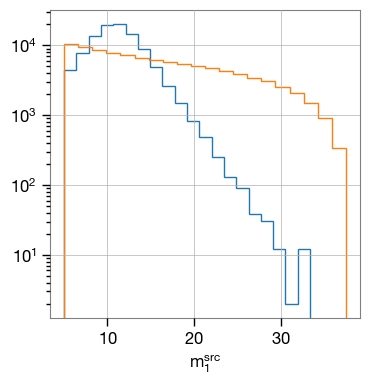

In [155]:
plt.hist(zpopIII, histtype='step', bins=20)
#plt.hist(zpopI_II, histtype='step', bins=20)
#plt.hist(zpopI_II2, histtype='step', bins=20)
plt.hist(primordial, histtype='step', bins=20)
plt.xlabel(r'$m_1^{src}$')
plt.yscale('log')
plt.show()

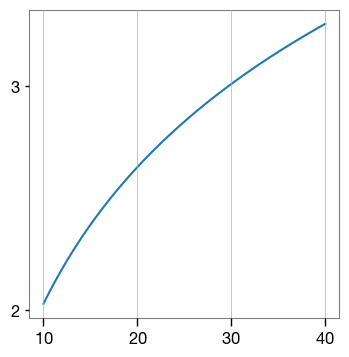

In [19]:
x_ = np.linspace(10,40,100)
y_ = (Planck18.age(z=x_).value/Planck18.age(z=0).value)**(-34/37) / (1+x_)
#y_ = merger_rate_density_popIII(x_)
plt.plot(x_,y_)
plt.yscale('log')

In [ ]:
# primordial

In [1]:
import numpy as np
from ler import CompactBinaryPopulation
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
ler_ = CompactBinaryPopulation(z_min=0., z_max=20., event_type='primordial')

In [3]:
popI_II = ler_.sample_source_redshifts(size=10000, z_min=0., z_max=20)

In [21]:
popIII = ler_.sample_source_redshifts(size=10000, z_min=0., z_max=20)

In [18]:
primordial = ler_.sample_source_redshifts(size=10000, z_min=0., z_max=20)

In [14]:
ler_.z_max

20.0

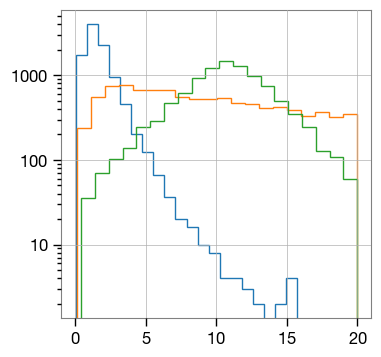

In [25]:
plt.hist(popI_II, histtype='step', bins=20)a
plt.hist(primordial, histtype='step', bins=20)
plt.hist(popIII, histtype='step', bins=20)
plt.yscale('log')
plt.show()

In [4]:
sample = ler_.sample_gw_parameters(nsamples=10000)

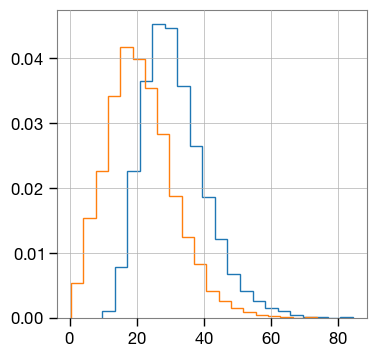

In [7]:
plt.hist(sample['mass_1_source'], histtype='step', bins=20, density=True)
plt.hist(sample['mass_2_source'], histtype='step', bins=20, density=True)
plt.show()

# function replacement

In [21]:
ler_.compact_binary_pop.merger_rate_density_popIII=merger_rate_density_popIII

In [ ]:
def binary_masses_popI_II(self, size, model_pars):
    """
    Function to calculate source mass1 and mass2 with PowerLaw+PEAK model 
    """
    
    model = p.mass_prior('BBH-powerlaw-gaussian', model_pars)
    mass_1_source, mass_2_source = model.sample(Nsample=size)
    while np.any(mass_2_source>mass_1_source):
        mass_1_source, mass_2_source = model.sample(Nsample=nsamples)
    
    return(mass_1_source,mass_2_source)

In [63]:
def test(x, **kwargs):
    try: 
        kwargs['a']
        kwargs['b']
        print(kwargs)
    except:
        print(x)

In [65]:
test(x=1, a=2)

1


In [62]:
{'a':None,}

{'a': None}

In [4]:
from ler.helperroutines import rejection_sample

In [16]:
def binary_masses_primordial(size, model_pars={'Mc':30.,'sigma':0.3}):
    """
    Function to calculate source mass1 and mass2 with PowerLaw+PEAK model 
    """
    
    Mc = model_pars['Mc']
    sigma = model_pars['sigma']
    q = mass_ratio(size)
    pdf = lambda m: np.exp(-np.log(m/Mc)**2 / (2*sigma**2)) / (np.sqrt(2*np.pi)*sigma*m)
    mass_1_source = rejection_sample(pdf, 5, 100, size=size)
    mass_2_source = q*mass_1_source

    return(mass_1_source,mass_2_source)

def mass_ratio(size, beta=1.1):
    pdf = lambda q: q**beta
    q = rejection_sample(pdf, 0, 1, size=size)
    return(q)

In [17]:
m1,m2 = binary_masses_primordial(1000)

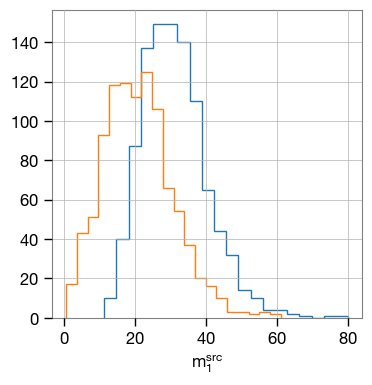

In [18]:
plt.hist(m1, histtype='step', bins=20)
plt.hist(m2, histtype='step', bins=20)
plt.xlabel(r'$m_1^{src}$')
#plt.yscale('log')
plt.show()

In [ ]:
binary_masses_